# Does a Lower GDP Per Capita mean a country will experience higher homicide rates amongst its citizens?
Habeeb Kotun Jr.<br>
September 25, 2021

The goal of this data exploration is to determine if countries with lower GDP per Capita experience higher homicide rates than those with a higher GDP Per Capita.<br> 
To explore this question further, I will utilize the GDP Per Capita dataset we used in the guided portion of the project and combine it with the homicide rates dataset that can be found [here](http://data.un.org/DocumentData.aspx?id=432) on the UNData site.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

In [2]:
# Read in homicide_rates.csv with ISO-8859-1 encoding (due to read in errors)
homicide_df = pd.read_csv('../data/homicide_rates.csv', encoding = "ISO-8859-1", header=1)

# Rename Unnamed: 2 column to country
homicide_df = homicide_df.rename(columns={'Unnamed: 2':'Country'})

# Keep rates of homicide and drop homicide number data
homicide_df = homicide_df.drop(columns=homicide_df.columns[4:24].tolist()) 

# Drop unneeded columns (Region, Subregion, Source, and # of homicides data)
homicide_df = homicide_df.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 3'])

# Drop rows without a NaN value in the Country column
homicide_df = homicide_df[homicide_df['Country'].notna()].set_index('Country')
homicide_df.columns = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014','2015','2016','2017','2018']
homicide_df.columns = homicide_df.columns.astype(int)
homicide_df = homicide_df.dropna(0)
homicide_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,
Albania,4.2,7.0,6.9,5.3,4.2,5.0,3.1,3.5,3.1,2.9,4.3,4.8,5.4,4.3,4.0,2.2,2.7,2.0,2.3
Armenia,3.0,2.9,2.3,2.5,2.8,1.9,2.7,2.6,3.3,3.4,1.9,2.5,2.3,2.2,2.5,2.6,3.0,2.4,1.7
Australia,1.9,1.8,1.9,1.5,1.3,1.3,1.4,1.2,1.2,1.2,1.0,1.1,1.1,1.1,1.0,1.0,0.9,0.8,0.9
Austria,1.0,0.9,0.8,0.6,0.7,0.7,0.7,0.5,0.7,0.6,0.7,0.9,0.9,0.7,0.5,0.5,0.7,0.8,1.0
Bangladesh,2.6,2.8,2.6,2.6,2.8,2.6,3.0,2.7,2.8,2.9,2.7,2.7,2.7,2.9,2.9,2.6,2.3,2.2,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sweden,1.1,1.0,1.1,0.9,1.2,0.9,1.0,1.2,0.9,1.0,1.0,0.9,0.7,0.9,0.9,1.1,1.1,1.1,1.1
Switzerland,1.0,1.2,1.2,1.0,1.1,1.0,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.7,0.5,0.7,0.5,0.5,0.6
United Kingdom (Northern Ireland),1.5,1.5,1.8,1.5,1.5,1.3,1.3,1.3,1.2,1.1,1.1,0.9,1.0,0.9,0.9,1.0,1.2,1.2,1.2


In [3]:
# Read in gdp_per_capita.csv and skip the last two rows
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', 
                     skiprows=[6870, 6871])

# Drop Value Footnotes column from gdp_df
gdp_df = gdp_df.drop(columns='Value Footnotes')

# Rename gdp_df columns
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [4]:
# Filter data from 2000 to 2018 in gdp_df
subset = (gdp_df['Year'] <= 2018) & (gdp_df['Year'] >= 2000)

# Pivot data in gdp_df to match info in homicide_df
gdp_pivoted = gdp_df[subset].pivot_table('GDP_Per_Capita', 
                                 index='Country', 
                                 columns='Year').dropna(0)
gdp_pivoted

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,
Albania,5911.956097,6462.425658,6776.106767,7177.633793,7604.838002,8066.557445,8596.557019,9179.741136,9944.233283,10346.864199,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,13366.303065
Algeria,8710.455991,8855.019904,9232.427813,9771.685462,10058.435939,10504.857200,10527.423643,10717.785718,10796.901320,10782.361398,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,11642.194485
Angola,4727.967467,4766.836736,5240.839732,5218.207136,5593.241537,6210.222827,6681.102354,7341.864145,7864.375304,7643.493749,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,6933.505560
Antigua and Barbuda,18311.013715,17207.493563,17143.825835,17955.104941,18745.681534,19682.635896,21851.593927,23511.331656,23130.553123,20046.839017,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123,21115.798269
Arab World,10940.274477,10893.213295,10731.004484,11051.575806,11742.589407,12117.689198,12559.771885,12827.453234,13261.601944,13063.094140,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921,14622.065826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,2954.982868,3105.643520,3269.875335,3462.879975,3689.732423,3931.765415,4167.107894,4422.285218,4628.030244,4830.304958,5089.411248,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829,7586.384939
West Bank and Gaza,4503.248860,3980.933319,3395.855001,3774.132413,4485.525458,4866.028474,4695.994727,4750.929692,4965.372950,5250.116075,5411.066482,5782.689593,5985.683247,6118.257181,5967.073437,6048.976597,6438.933640,6401.740891,6318.210068
World,11086.612825,11199.058187,11359.265445,11638.601657,12077.823821,12475.027505,12957.349105,13462.149842,13652.236548,13396.524163,13904.629132,14275.461871,14554.850133,14857.762340,15189.648507,15516.986524,15837.382961,16253.385518,16636.415941


In [5]:
# Merge cleaned gdp_pivoted and homicide_df datasets
homicide_gdp_merge = gdp_pivoted.merge(homicide_df, left_index=True, right_index=True, how='inner')

# Change column names to identify those pulled from gdp vs homicide dataframes
columns = homicide_gdp_merge.columns[0:19].str.replace('_x','_gdp')
columns = columns.append(homicide_gdp_merge.columns[19:].str.replace('_y','_homicide'))
homicide_gdp_merge.columns = columns

# Drop rows with NaN values
homicide_gdp_merge = homicide_gdp_merge
homicide_gdp_merge

,2000_gdp,2001_gdp,2002_gdp,2003_gdp,2004_gdp,2005_gdp,2006_gdp,2007_gdp,2008_gdp,2009_gdp,...,2009_homicide,2010_homicide,2011_homicide,2012_homicide,2013_homicide,2014_homicide,2015_homicide,2016_homicide,2017_homicide,2018_homicide
Country,,,,,,,,,,,,,,,,,,,,,
Albania,5911.956097,6462.425658,6776.106767,7177.633793,7604.838002,8066.557445,8596.557019,9179.741136,9944.233283,10346.864199,...,2.9,4.3,4.8,5.4,4.3,4.0,2.2,2.7,2.0,2.3
Armenia,4048.257817,4464.384368,5081.515208,5823.727671,6472.131214,7419.853768,8464.468558,9708.405466,10467.519013,9052.389818,...,3.4,1.9,2.5,2.3,2.2,2.5,2.6,3.0,2.4,1.7
Australia,38462.015363,38679.590653,39739.301627,40423.970156,41578.498520,42348.174528,42894.133149,44265.698669,44974.526320,44910.450858,...,1.2,1.0,1.1,1.1,1.1,1.0,1.0,0.9,0.8,0.9
Austria,46551.459787,46961.233247,47502.544267,47716.755341,48718.669382,49473.748988,50929.968151,52657.375581,53259.411105,51120.332050,...,0.6,0.7,0.9,0.9,0.7,0.5,0.5,0.7,0.8,1.0
Bangladesh,1937.729314,1998.066427,2037.236171,2097.168670,2171.688628,2279.531274,2399.082006,2537.111286,2659.049177,2762.180437,...,2.9,2.7,2.7,2.7,2.9,2.9,2.6,2.3,2.2,2.4
Barbados,15124.213425,14713.079572,14778.764145,15050.513185,15210.016588,15752.189110,16612.614825,16903.933608,16946.670961,16019.885593,...,6.8,11.0,9.5,7.8,8.4,8.8,10.9,7.7,10.5,9.8
Belarus,8053.173638,8477.084011,8961.641120,9660.193688,10839.956273,11940.186596,13214.871580,14417.353531,15942.897680,16010.439956,...,5.2,4.3,4.0,3.6,3.5,3.6,3.5,3.3,2.5,2.4
Brazil,11597.143345,11598.693853,11796.970553,11782.467772,12312.334429,12561.820173,12917.916885,13560.545100,14110.345138,13957.679120,...,23.0,22.1,24.3,26.6,26.9,28.8,28.6,29.9,30.8,27.4
Bulgaria,10233.849916,10838.114310,11735.304188,12438.022494,13339.570056,14401.857204,15498.763801,16636.909928,17773.691063,17284.862898,...,2.0,2.0,1.7,1.9,1.5,1.6,1.8,1.1,1.5,1.3


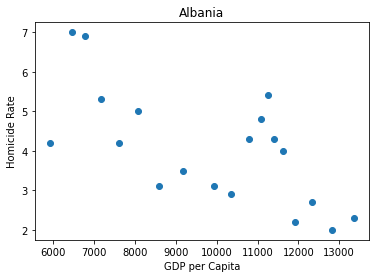

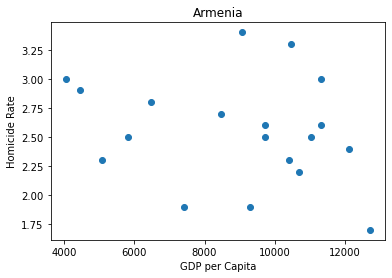

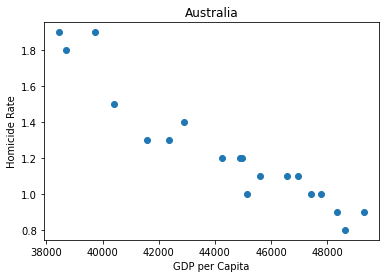

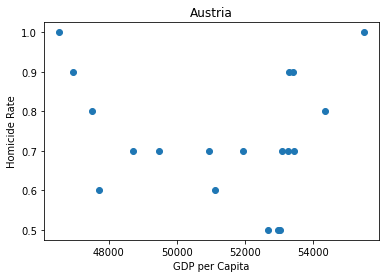

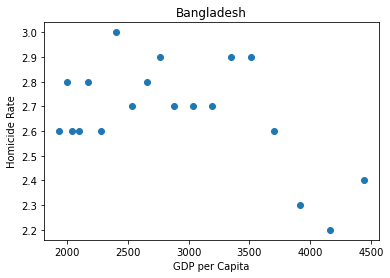

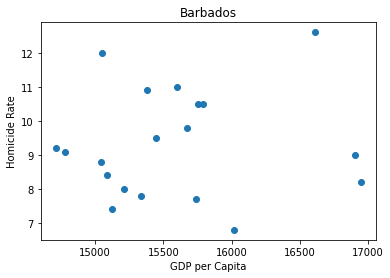

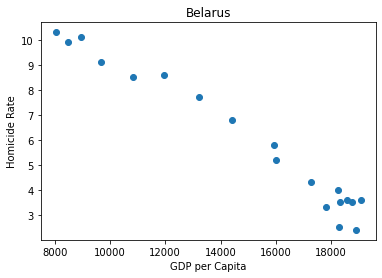

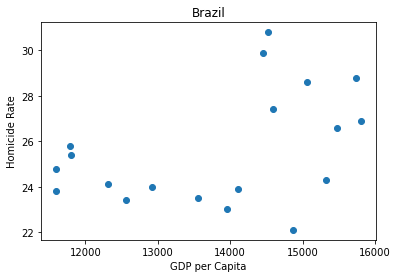

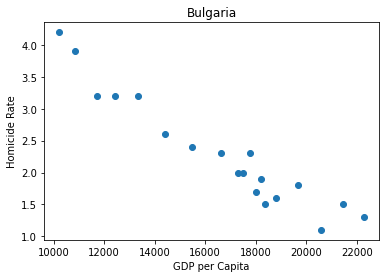

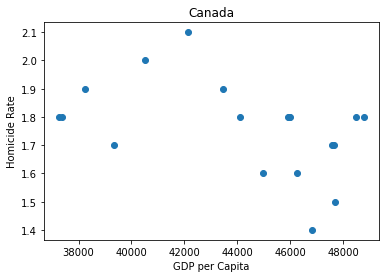

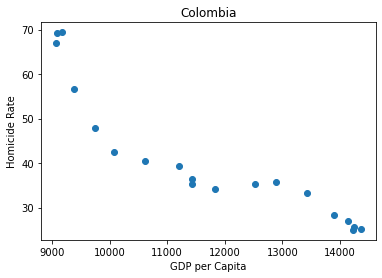

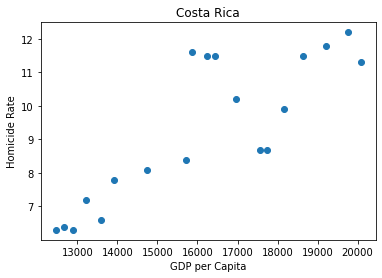

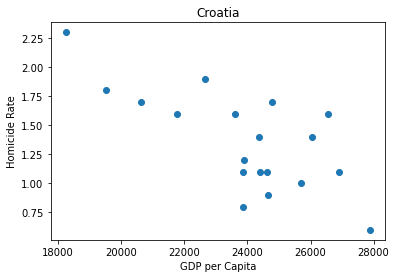

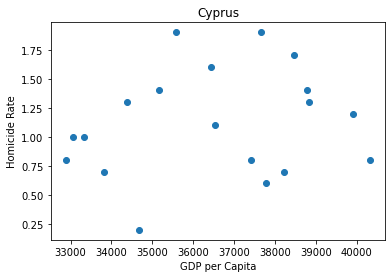

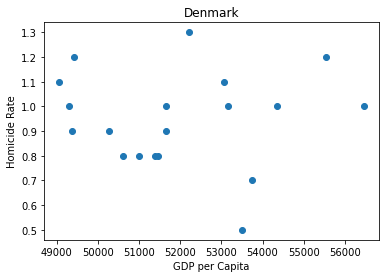

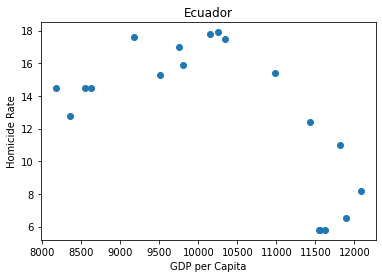

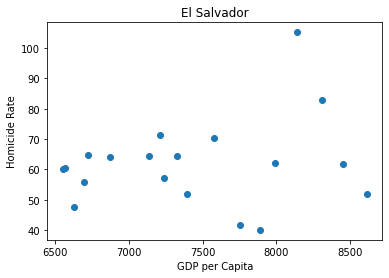

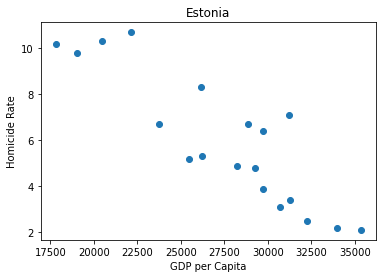

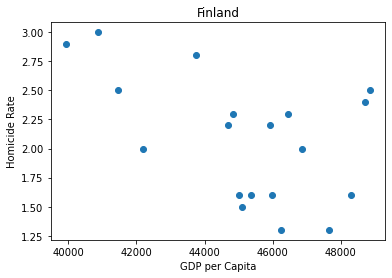

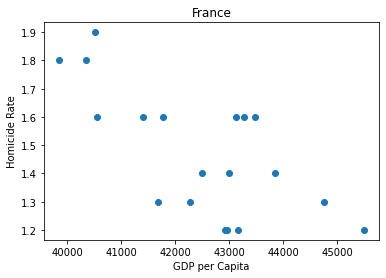

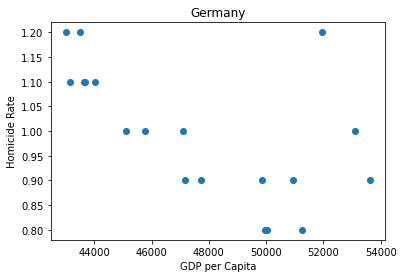

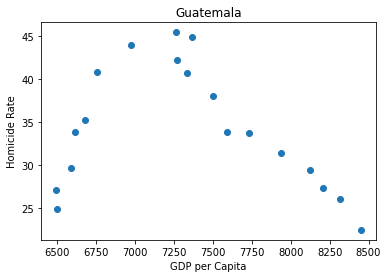

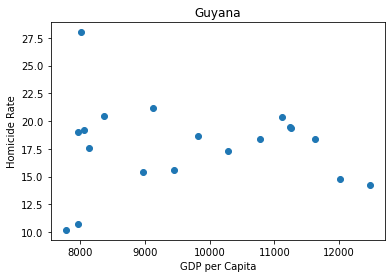

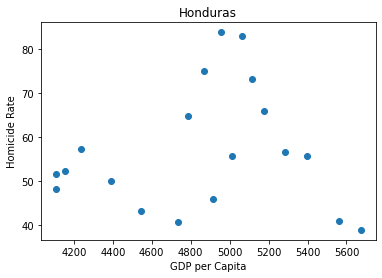

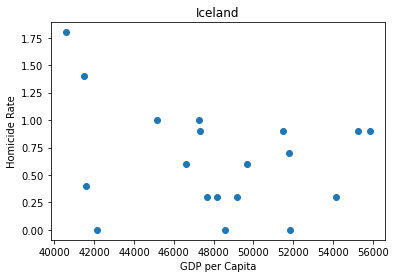

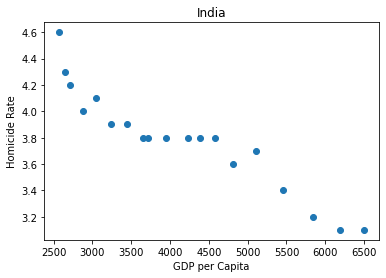

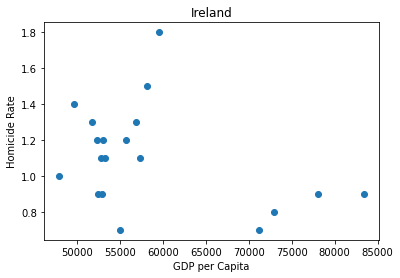

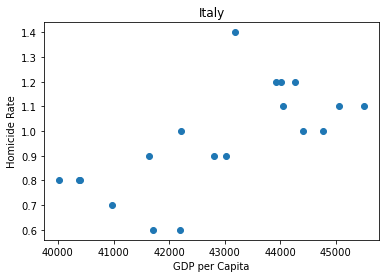

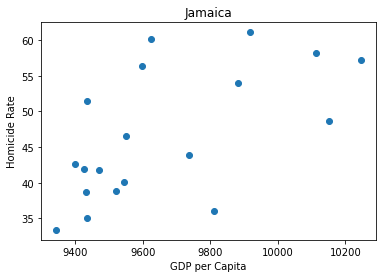

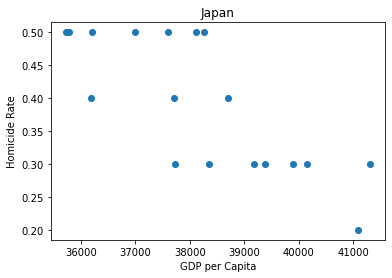

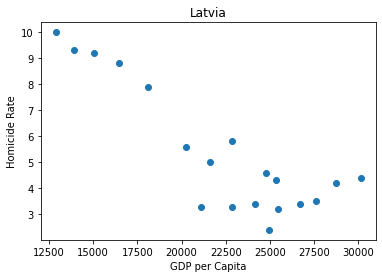

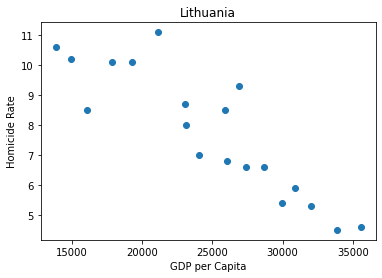

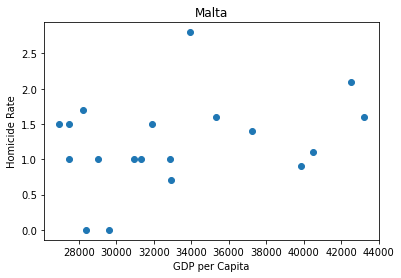

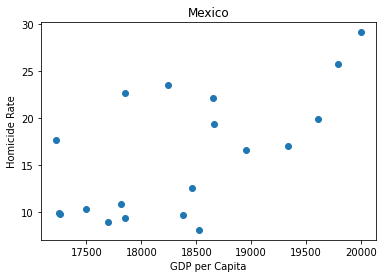

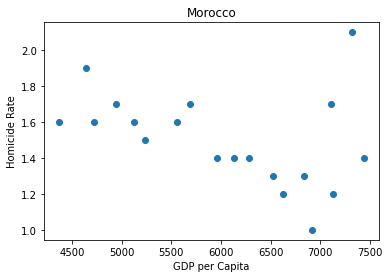

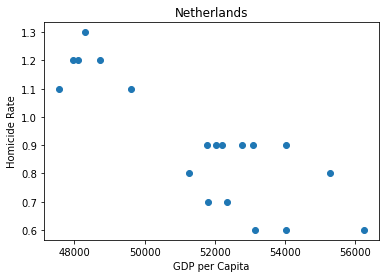

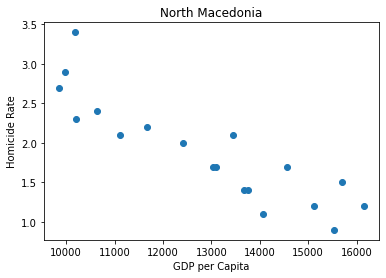

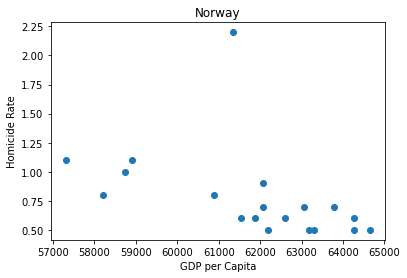

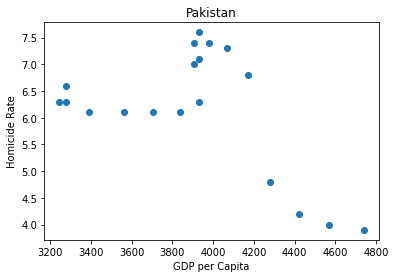

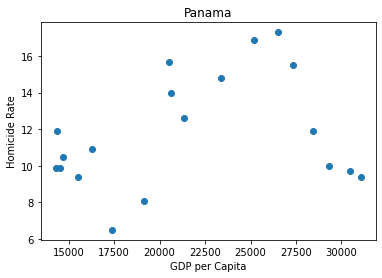

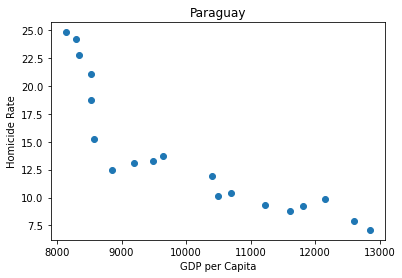

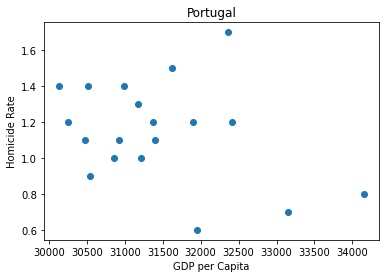

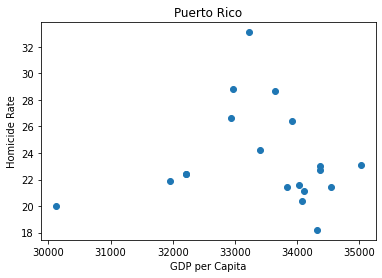

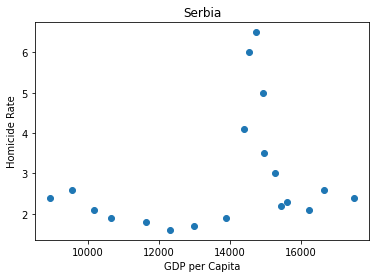

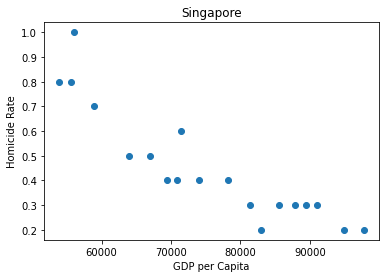

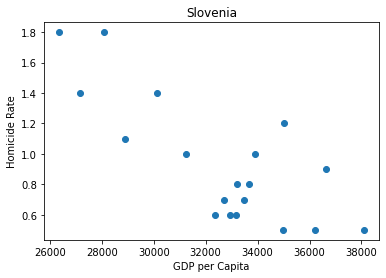

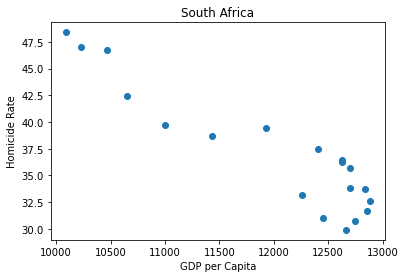

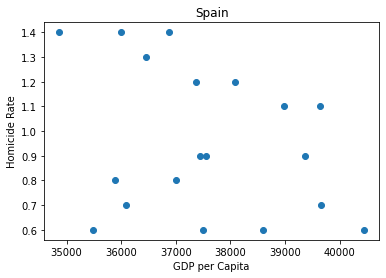

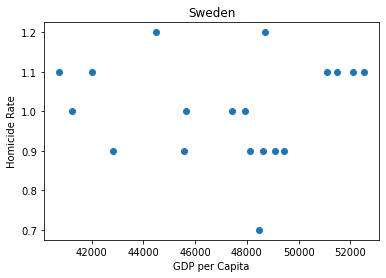

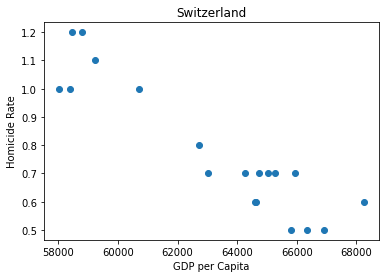

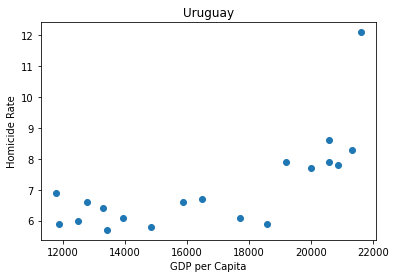

In [6]:
# Quick scatterplot of each country's GDP per Capita vs Homicide Rate
for country in homicide_gdp_merge.index:
    plt.scatter(homicide_gdp_merge.loc[country][0:19], homicide_gdp_merge.loc[country][19:])
    plt.title(country)
    plt.xlabel('GDP per Capita')
    plt.ylabel('Homicide Rate')
    plt.show()

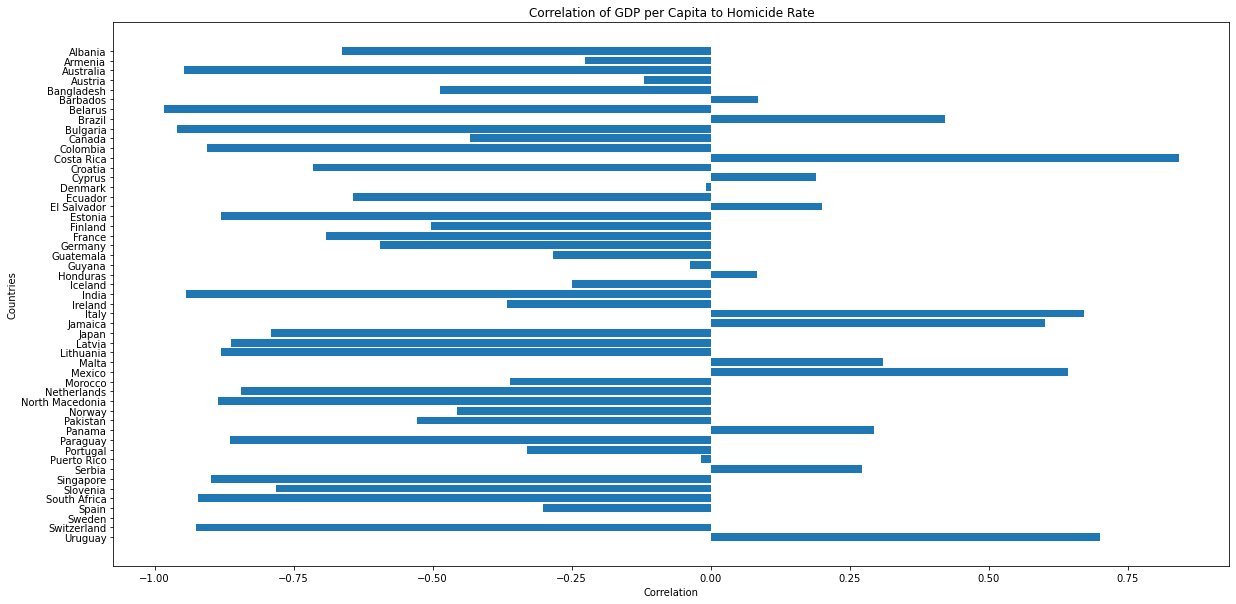

In [7]:
# Make a empty dictionary for correlation graphing
corr_graphing = {}

# Calculate the correlation between GDP per Capita and murder rate from each country in homicide_gdp_merge
for country in homicide_gdp_merge.index:
    global corr_graphing

    # Make a empty dataframe for correlation calculation
    corr_df = pd.DataFrame(columns=['gdp', 'homicide'])
    
    gdp = homicide_gdp_merge.loc[country][0:19]
    homicide = homicide_gdp_merge.loc[country][19:]

    corr_df['gdp'] = gdp
    corr_df.index = corr_df.index.str.replace('_gdp','_homicide')
    corr_df['homicide'] = homicide
    corr_df.index = corr_df.index.str.replace('_homicide','')

    corr = corr_df[['gdp', 'homicide']].corr()['gdp']['homicide']
    corr_graphing[country] = corr

# Plot correlations on bar graph
names = list(corr_graphing.keys())
values = list(corr_graphing.values())
plt.figure(figsize=(20, 10))
plt.barh(range(len(names)), values, tick_label=names);
plt.title('Correlation of GDP per Capita to Homicide Rate')
plt.xlabel('Correlation')
plt.ylabel('Countries')
plt.gca().invert_yaxis()

## Conclusion
The comparison of the two datasets shows that there are some countries where a lower GDP per Capita resulted in higher murder rates in the country.<br>
Although these are intresting findings, it doesn't conclude causation between the two variables for countries with negative correlations. My exploration doesn't take into account the sudden increases or declines to a countrie's GDP for various reasons. It also doesn't take into account other factors that could increase homicide rates amongst citizens (civil war, etc.)